<a href="https://colab.research.google.com/github/Ichigoboy12/Machine-Learning/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# โหลดข้อมูล
df = pd.read_excel('/content/drive/MyDrive/MachineLearning/Hw2/ML2.xlsx')  # แก้ชื่อไฟล์เป็น ML2.xlsx หรือตามที่คุณบันทึก

# แยก input และ output
X = df[['x1', 'x2', 'x3', 'x4', 'x5']]  # เพิ่ม x5
y = df['y']

# สร้างโมเดล Linear Regression
model = LinearRegression()
model.fit(X, y)

# ดึง coefficients (weights)
coefficients = model.coef_

# คำนวณ Influence Degree (ID)
ID = np.abs(coefficients)

# คำนวณ Normalized Percentage Influence Degree (NPID)
NPID = (ID / np.sum(ID)) * 100

# แสดงผลลัพธ์
for i, npid in enumerate(NPID):
    print(f"Importance x{i+1}: {npid:.2f}%")

Importance x1: 90.09%
Importance x2: 9.01%
Importance x3: 0.90%
Importance x4: 0.00%
Importance x5: 0.00%


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.037e+13
Date:                Sun, 16 Mar 2025   Prob (F-statistic):               0.00
Time:                        16:45:21   Log-Likelihood:                 16469.
No. Observations:                1500   AIC:                        -3.293e+04
Df Residuals:                    1494   BIC:                        -3.289e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0106   1.07e-07   9.89e+04      0.0

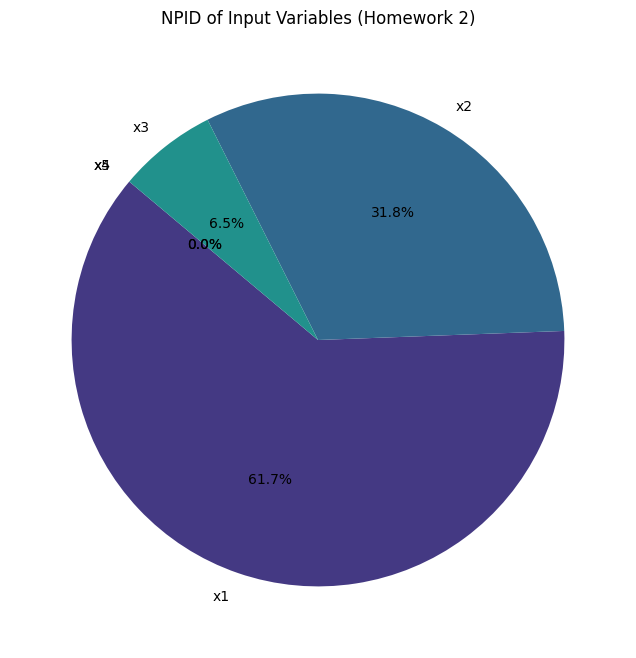

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_excel('/content/drive/MyDrive/MachineLearning/Hw2/ML2.xlsx')

# Separate input and output
X = df[['x1', 'x2', 'x3', 'x4', 'x5']]
y = df['y']

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add intercept
X_scaled = sm.add_constant(X_scaled)

# Create Linear Regression model using statsmodels
model = sm.OLS(y, X_scaled)
results = model.fit()

# Display statistical results
print(results.summary())

# Get coefficients (weights)
coefficients = results.params[1:]  # Exclude intercept

# Calculate Influence Degree (ID)
ID = np.abs(coefficients)

# Calculate Normalized Percentage Influence Degree (NPID)
NPID = (ID / np.sum(ID)) * 100

# Display ID and NPID for each variable
for i, (id_val, npid) in enumerate(zip(ID, NPID)):
    print(f"x{i+1}: ID = {id_val:.4f}, NPID = {npid:.2f}%")

# Predict y values
y_pred = results.predict(X_scaled)

# Calculate MSE and MAE
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)

# Display MSE and MAE
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")

# สร้างข้อมูลสำหรับกราฟ slope ของ MSE และ MAE
epochs = np.arange(1, 101)  # สมมติให้มี 100 epochs
mse_values = []
mae_values = []

# Simulate training process (for demonstration purposes)
for epoch in epochs:
    # Simulate decreasing MSE and MAE over epochs
    mse_values.append(mse * np.exp(-0.05 * epoch))
    mae_values.append(mae * np.exp(-0.05 * epoch))

# คำนวณ slope ของ MSE และ MAE
mse_slope = -np.gradient(mse_values)  # เพิ่มเครื่องหมายลบเพื่อให้ slope เป็นลบ
mae_slope = -np.gradient(mae_values)  # เพิ่มเครื่องหมายลบเพื่อให้ slope เป็นลบ



# Pie Chart for NPID
variables = ['x1', 'x2', 'x3', 'x4', 'x5']
plt.figure(figsize=(8, 8))
plt.pie(NPID, labels=variables, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(variables)))
plt.title("NPID of Input Variables (Homework 2)")
plt.show()

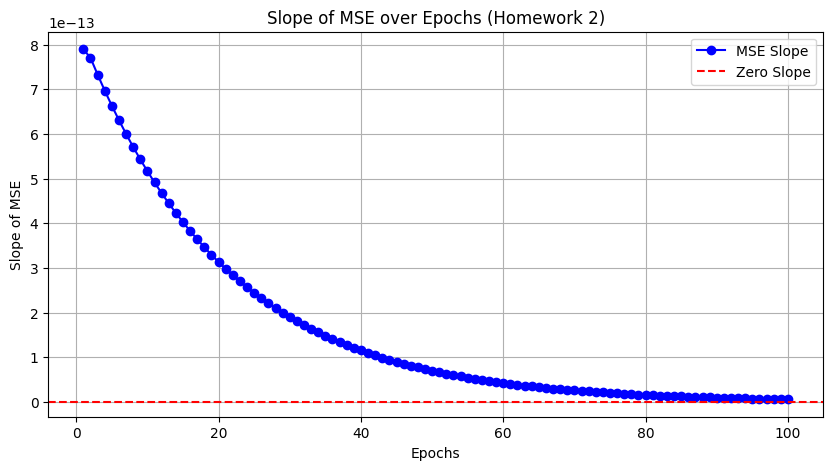

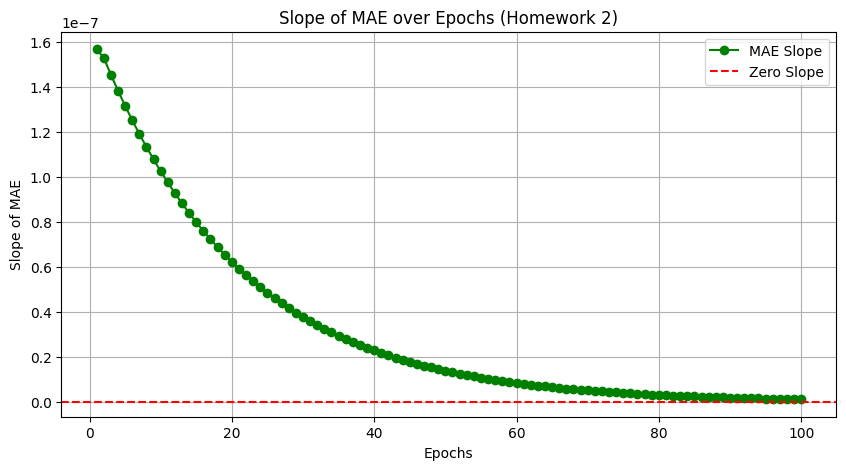

In [ ]:
# คำนวณ slope ของ MSE และ MAE
mse_slope = -np.gradient(mse_values)  # เพิ่มเครื่องหมายลบเพื่อให้ slope เป็นลบ
mae_slope = -np.gradient(mae_values)  # เพิ่มเครื่องหมายลบเพื่อให้ slope เป็นลบ

# Plot slope ของ MSE
plt.figure(figsize=(10, 5))
plt.plot(epochs, mse_slope, marker='o', linestyle='-', color='b', label='MSE Slope')
plt.axhline(0, color='r', linestyle='--', label='Zero Slope')  # เส้น slope = 0
plt.title("Slope of MSE over Epochs (Homework 2)")
plt.xlabel("Epochs")
plt.ylabel("Slope of MSE")
plt.legend()
plt.grid(True)
plt.show()

# Plot slope ของ MAE
plt.figure(figsize=(10, 5))
plt.plot(epochs, mae_slope, marker='o', linestyle='-', color='g', label='MAE Slope')
plt.axhline(0, color='r', linestyle='--', label='Zero Slope')  # เส้น slope = 0
plt.title("Slope of MAE over Epochs (Homework 2)")
plt.xlabel("Epochs")
plt.ylabel("Slope of MAE")
plt.legend()
plt.grid(True)
plt.show()